# Hw10

## Частина 1

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


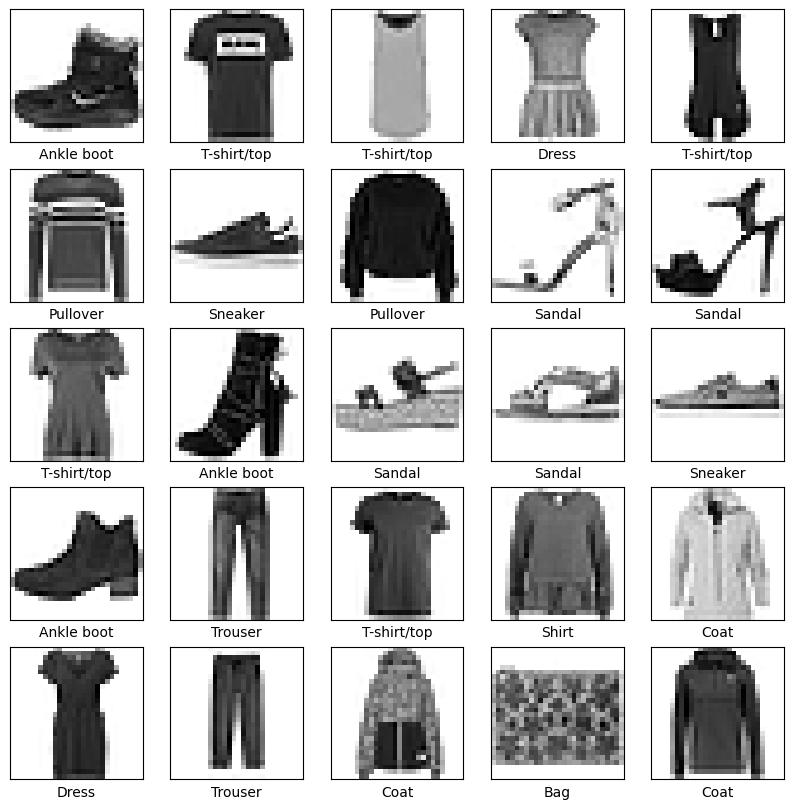

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def visualize_prediction(predictions):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])

        label = np.random.randint(0, len(predictions))
        plt.imshow(test_images[label], cmap="binary")

        predicted_label = np.argmax(predictions[label])
        true_label = test_labels[label]
        if predicted_label == true_label:
            color = "green"
        else:
            color = "red"
        plt.xlabel("{}({})".format(class_names[predicted_label],
                                   class_names[true_label]),
                   color=color)

In [ ]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    acc_values = history_dict["accuracy"]
    val_acc_values = history_dict["val_accuracy"]

    epochs = range(1, len(acc_values) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss_values, color="r", label="Training loss")
    plt.plot(epochs, acc_values, "b", label="Training accuracy")
    plt.plot(epochs, val_loss_values, "r:", label="Validation loss")
    plt.plot(epochs, val_acc_values, "b:", label="Validation accuracy")

    plt.title("Training loss and accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

### Створення моделі

In [ ]:

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation="relu"),
    keras.layers.Flatten(),
    # keras.layers.Dropout(0.2),
    # keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# model.summary()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("fashion_model.keras", save_best_only=True, monitor="val_accuracy", verbose=1)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, verbose=1)

history = model.fit(train_images, train_labels, epochs=40, validation_split=0.2, callbacks=[checkpoint, early_stopping], batch_size=512)

Epoch 1/40
94/94 [==============================] - ETA: 0s - loss: 0.6134 - accuracy: 0.7812
Epoch 1: val_accuracy improved from -inf to 0.83925, saving model to fashion_model.keras
94/94 [==============================] - 82s 844ms/step - loss: 0.6134 - accuracy: 0.7812 - val_loss: 1.7528 - val_accuracy: 0.8393
Epoch 2/40
94/94 [==============================] - ETA: 0s - loss: 0.3714 - accuracy: 0.8684
Epoch 2: val_accuracy improved from 0.83925 to 0.86125, saving model to fashion_model.keras
94/94 [==============================] - 74s 788ms/step - loss: 0.3714 - accuracy: 0.8684 - val_loss: 1.3819 - val_accuracy: 0.8612
Epoch 3/40
94/94 [==============================] - ETA: 0s - loss: 0.3149 - accuracy: 0.8877
Epoch 3: val_accuracy improved from 0.86125 to 0.87325, saving model to fashion_model.keras
94/94 [==============================] - 72s 766ms/step - loss: 0.3149 - accuracy: 0.8877 - val_loss: 1.0191 - val_accuracy: 0.8733
Epoch 4/40
94/94 [==============================]

In [ ]:
best_model = keras.models.load_model("fashion_model.keras")
loss, acc = best_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {acc:.3}')

313/313 [==============================] - 4s 12ms/step - loss: 0.2521 - accuracy: 0.9143
Test accuracy: 0.914


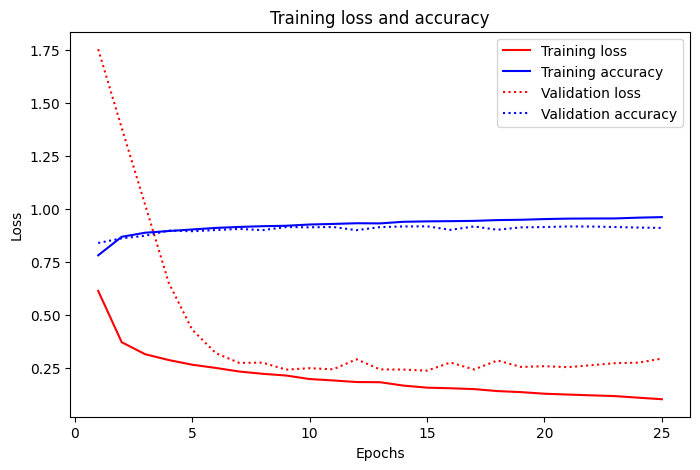

In [ ]:
plot_history(history)

313/313 [==============================] - 5s 16ms/step


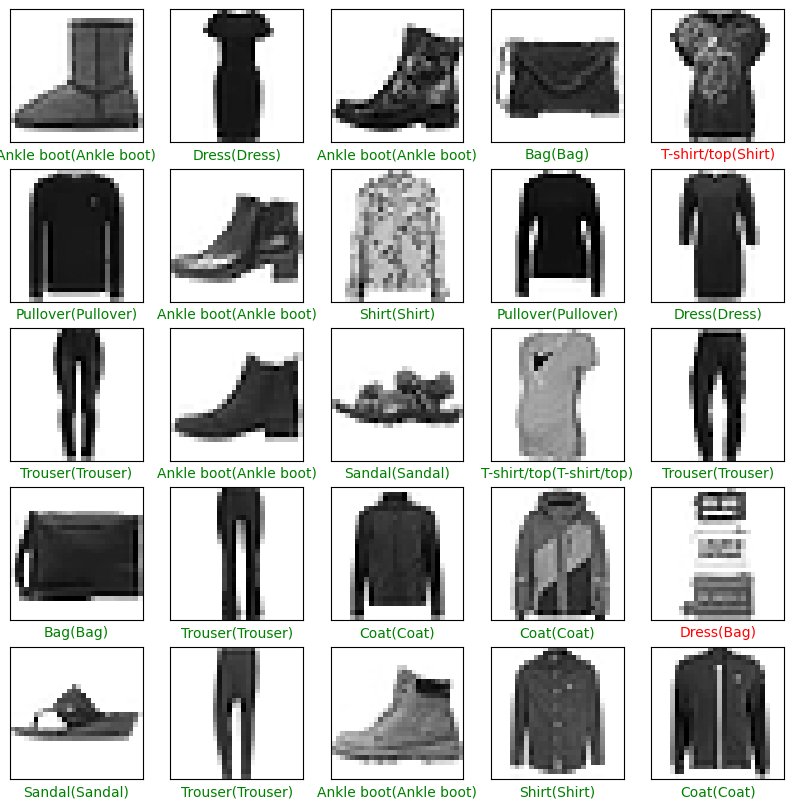

In [ ]:
visualize_prediction(model.predict(test_images))

## Частина 2
### Використання переднавченої моделі vgg16

In [117]:
from keras.applications.vgg16 import VGG16

In [118]:
test_images.shape

(10000, 28, 28)

### Так як переднавчена модель vgg16 приймає зображення не менше ніж 32х32, змінюємо розмір зображень.


In [119]:
import cv2
train_images_vgg = np.array([cv2.resize(img, (32, 32)) for img in train_images])
test_images_vgg = np.array([cv2.resize(img, (32, 32)) for img in test_images])
train_images_vgg.shape

(60000, 32, 32)

### модель створена для обробки 3-х канальних зображень, тож робимо відповідні перетворення

In [120]:
test_images_vgg = np.stack((test_images_vgg, ) * 3, -1)
train_images_vgg = np.stack((train_images_vgg, ) * 3, -1)

### створюємо нову модель, додавши до існуючої переднавченої моделі вихідні шари

In [148]:
base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base.trainable = False

pretrained_model = keras.Sequential([
    base,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])
pretrained_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_26 (Flatten)        (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 256)               131328    
                                                                 
 dense_53 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [123]:
pretrained_model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [124]:
checkpoint = keras.callbacks.ModelCheckpoint("fashion_model_vgg16.keras", save_best_only=True, monitor="val_accuracy", verbose=1)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, verbose=1)
history = pretrained_model.fit(train_images_vgg, train_labels, epochs=40, validation_split=0.2, callbacks=[checkpoint, early_stopping], batch_size=128)

Epoch 1/40
375/375 [==============================] - ETA: 0s - loss: 0.6109 - accuracy: 0.7889
Epoch 1: val_accuracy improved from -inf to 0.82392, saving model to fashion_model_vgg16.keras
375/375 [==============================] - 9s 23ms/step - loss: 0.6109 - accuracy: 0.7889 - val_loss: 0.4797 - val_accuracy: 0.8239
Epoch 2/40
375/375 [==============================] - ETA: 0s - loss: 0.4473 - accuracy: 0.8377
Epoch 2: val_accuracy improved from 0.82392 to 0.84350, saving model to fashion_model_vgg16.keras
375/375 [==============================] - 8s 20ms/step - loss: 0.4473 - accuracy: 0.8377 - val_loss: 0.4334 - val_accuracy: 0.8435
Epoch 3/40
372/375 [============================>.] - ETA: 0s - loss: 0.4087 - accuracy: 0.8508
Epoch 3: val_accuracy did not improve from 0.84350
375/375 [==============================] - 8s 20ms/step - loss: 0.4085 - accuracy: 0.8509 - val_loss: 0.4575 - val_accuracy: 0.8334
Epoch 4/40
374/375 [============================>.] - ETA: 0s - loss: 0.

In [125]:
best_model = keras.models.load_model("fashion_model_vgg16.keras")
loss, acc = best_model.evaluate(test_images_vgg, test_labels)
print(f'Test accuracy: {acc:.3}')

313/313 [==============================] - 3s 8ms/step - loss: 0.3692 - accuracy: 0.8756
Test accuracy: 0.876


### як бачимо, новостворена модель працює, але точність передбачень поступається попередній, створеній з нуля.

### спробуємо покращити якість передбачень, розморозивши останні кілька шарів переднавченої моделі

In [144]:
base2 = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base2.trainable = True

for layer in base2.layers[:-5]:
  layer.trainable = False

mod_pretrained_model = keras.Sequential([
    base2,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.Dense(10, activation="softmax")])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

mod_pretrained_model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



In [145]:
checkpoint = keras.callbacks.ModelCheckpoint("fashion_model_vgg16_mod.keras", save_best_only=True, monitor="val_accuracy", verbose=1)
history_mod = mod_pretrained_model.fit(train_images_vgg, train_labels, epochs=40, validation_split=0.2, callbacks=[checkpoint, early_stopping], batch_size=128)


Epoch 1/40
373/375 [============================>.] - ETA: 0s - loss: 4.9008 - accuracy: 0.8501
Epoch 1: val_accuracy improved from -inf to 0.86583, saving model to fashion_model_vgg16_mod.keras
375/375 [==============================] - 15s 35ms/step - loss: 4.8945 - accuracy: 0.8501 - val_loss: 3.6736 - val_accuracy: 0.8658
Epoch 2/40
375/375 [==============================] - ETA: 0s - loss: 2.7763 - accuracy: 0.8946
Epoch 2: val_accuracy improved from 0.86583 to 0.88800, saving model to fashion_model_vgg16_mod.keras
375/375 [==============================] - 13s 34ms/step - loss: 2.7763 - accuracy: 0.8946 - val_loss: 2.1206 - val_accuracy: 0.8880
Epoch 3/40
375/375 [==============================] - ETA: 0s - loss: 1.7092 - accuracy: 0.9076
Epoch 3: val_accuracy improved from 0.88800 to 0.89750, saving model to fashion_model_vgg16_mod.keras
375/375 [==============================] - 12s 31ms/step - loss: 1.7092 - accuracy: 0.9076 - val_loss: 1.4671 - val_accuracy: 0.8975
Epoch 4/40

In [146]:
best_mod_model = keras.models.load_model("fashion_model_vgg16_mod.keras")
loss, acc = best_mod_model.evaluate(test_images_vgg, test_labels)
print(f'Test accuracy: {acc:.3}')

313/313 [==============================] - 3s 8ms/step - loss: 0.3988 - accuracy: 0.9111
Test accuracy: 0.911


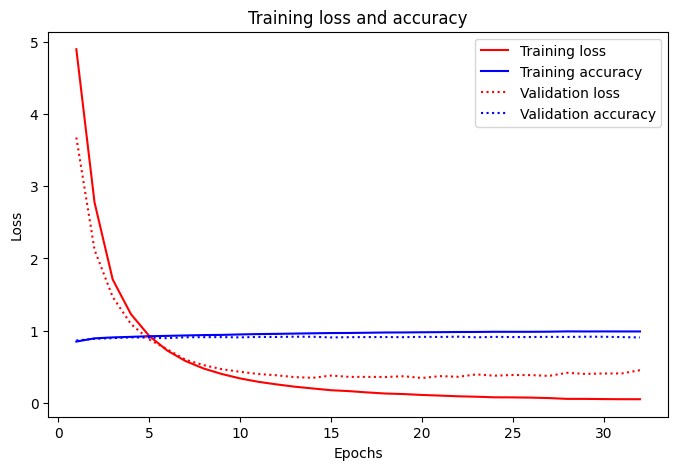

In [147]:
plot_history(history_mod)

### за допомогою довнавчання вдалось підвищити точність передбачень, але обмеження платформи Google Colab не дозволяє провести достатню кількість експериментів з підбором гіперпараметрів, тому на цьому місці я змушений зупинитись.